<a href="https://colab.research.google.com/github/Isaac0py/Class/blob/main/Ensemblelearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/CSV/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['target'].value_counts()

,count
target,
1,164
0,138


In [8]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df[cat_cols] = df[cat_cols].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    object 
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    object 
 6   restecg   302 non-null    object 
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    object 
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    object 
 11  ca        302 non-null    int64  
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 33.2+ KB


In [9]:
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['figure.dpi']= 200

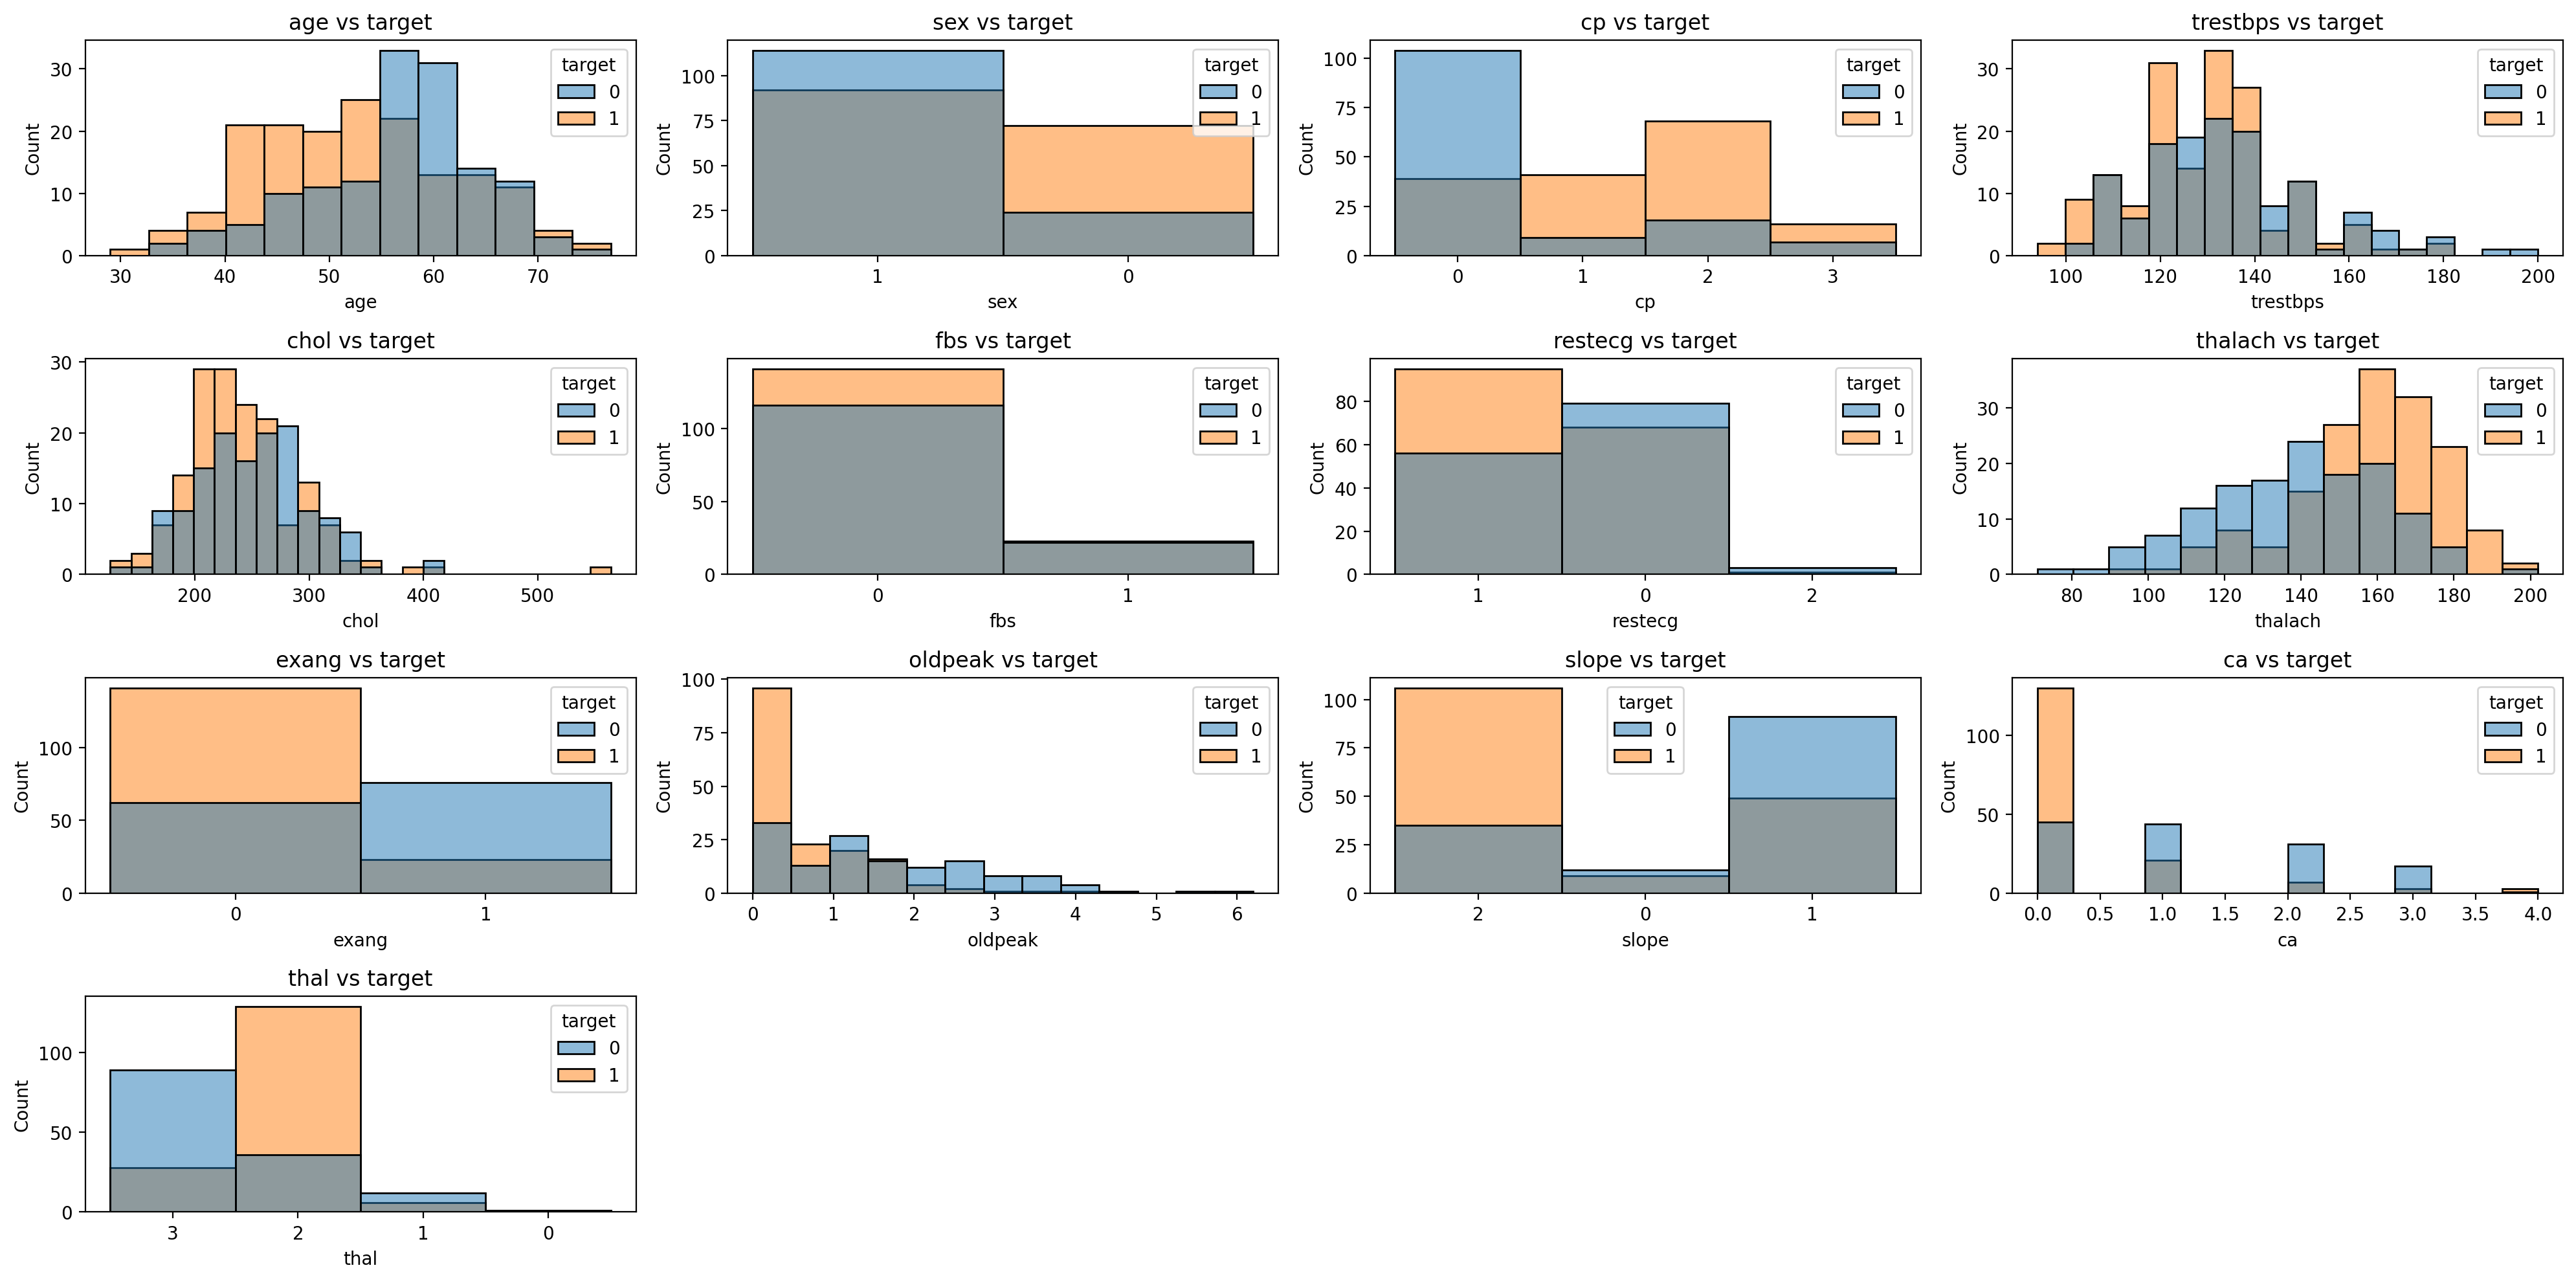

In [10]:
columns = df.columns[:-1]
for i, col in enumerate(columns):
  plt.subplot(4,4, i+1)
  sns.histplot(x=col, data=df, hue='target')
  plt.xlabel(col)
  plt.title('{} vs target'.format(col))
  plt.tight_layout()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.drop('target', axis=1)
y = df['target']

In [13]:
X = pd.get_dummies(X, drop_first=True).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 19), (61, 19), (241,), (61,))

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [16]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_predict = ada.predict(X_test)

print('accuracy:', accuracy_score(y_test, y_predict))

accuracy: 0.7704918032786885


Text(0.5, 1.0, 'Confusion Matrix')

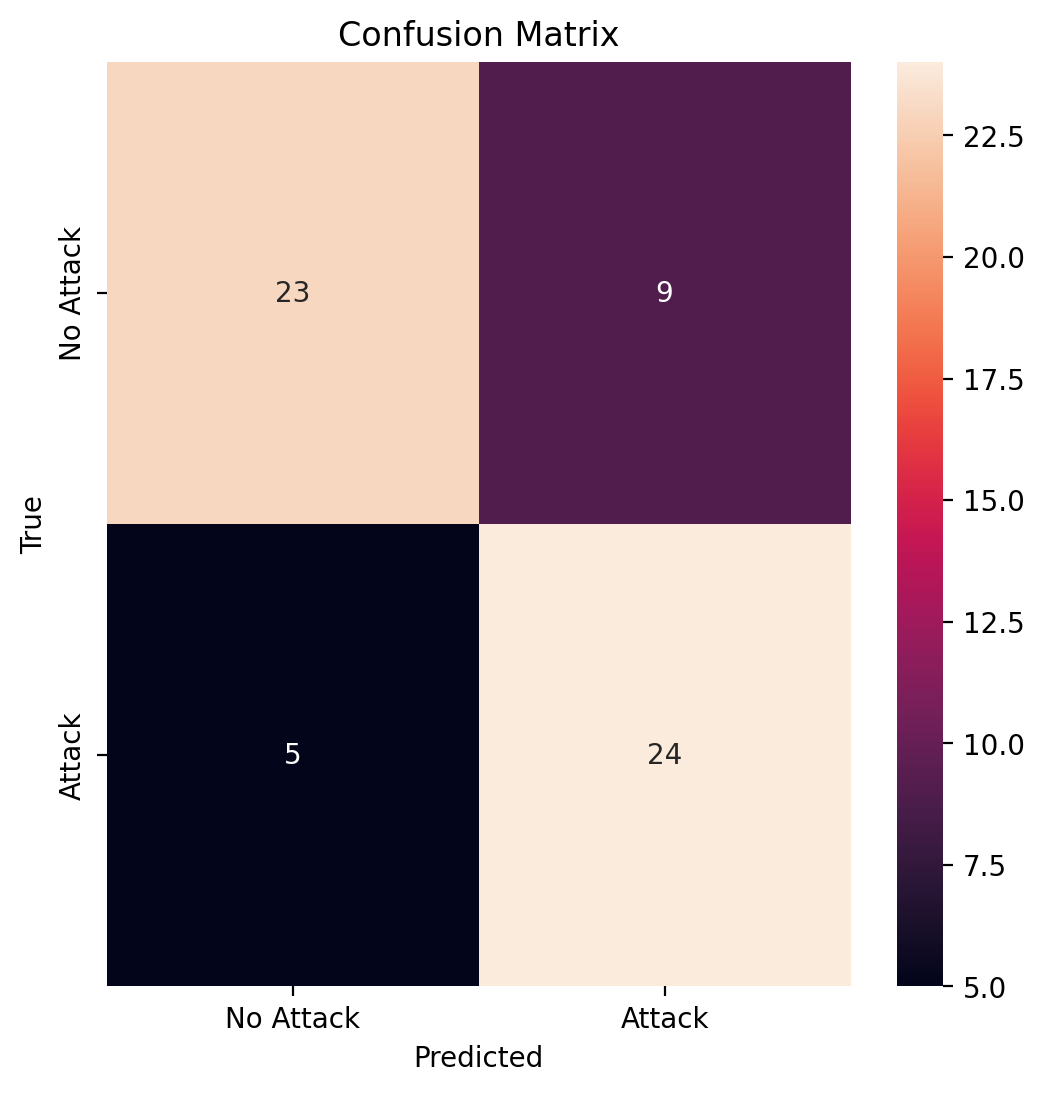

In [17]:
plt.figure(figsize=(6,6), dpi=200)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True,
            xticklabels=['No Attack', 'Attack'],
            yticklabels=['No Attack', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [18]:
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]
}

grid = GridSearchCV(ada, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [19]:
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)

Best parameters: {'learning_rate': 1.0, 'n_estimators': 250}
Best score: 0.8255952380952382


In [20]:
y_predict = grid.predict(X_test)

print('accuracy:', accuracy_score(y_test, y_predict))

accuracy: 0.8032786885245902


In [21]:
print('classificatio report:\n', classification_report(y_test, y_predict))

classificatio report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [22]:
!pip install xgboost

In [23]:
from xgboost import XGBClassifier

In [24]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_predict = xgb.predict(X_test)

print('accuracy:', accuracy_score(y_test, y_predict))

accuracy: 0.8032786885245902


In [25]:
xgb = XGBClassifier()

params = {'n_estimators':[300,350,400], 'learning_rate':[0.01, 0.1, 1,2], 'max_depth':[1,2,3,4,5], 'lambda':[1,2,3]}

grid = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'lambda': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1, 2],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [300, 350, 400]})

In [26]:
grid.best_params_, grid.best_score_

({'lambda': 1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300},
 np.float64(0.8090986394557824))

In [27]:
y_predict = grid.predict(X_test)

print('accuracy:', accuracy_score(y_test, y_predict))

accuracy: 0.7540983606557377


In [28]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [29]:
from catboost import CatBoostClassifier

In [ ]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_predict = cat.predict(X_test)

print('accuracy:', accuracy_score(y_test, y_predict))

Learning rate set to 0.005611
0:	learn: 0.6882286	total: 48.4ms	remaining: 48.3s
1:	learn: 0.6859790	total: 48.9ms	remaining: 24.4s
2:	learn: 0.6813434	total: 50.1ms	remaining: 16.7s
3:	learn: 0.6774547	total: 51.3ms	remaining: 12.8s
4:	learn: 0.6739125	total: 52.6ms	remaining: 10.5s
5:	learn: 0.6698012	total: 53.9ms	remaining: 8.92s
6:	learn: 0.6654464	total: 55ms	remaining: 7.8s
7:	learn: 0.6615623	total: 56.1ms	remaining: 6.95s
8:	learn: 0.6575602	total: 57.2ms	remaining: 6.3s
9:	learn: 0.6542721	total: 58.4ms	remaining: 5.78s
10:	learn: 0.6503565	total: 59.5ms	remaining: 5.35s
11:	learn: 0.6462321	total: 60.6ms	remaining: 4.99s
12:	learn: 0.6423828	total: 61.7ms	remaining: 4.68s
13:	learn: 0.6384955	total: 62.8ms	remaining: 4.42s
14:	learn: 0.6342929	total: 64ms	remaining: 4.21s
15:	learn: 0.6316800	total: 65.2ms	remaining: 4.01s
16:	learn: 0.6283430	total: 66.3ms	remaining: 3.83s
17:	learn: 0.6250053	total: 67.4ms	remaining: 3.68s
18:	learn: 0.6208366	total: 68.5ms	remaining: 3.54

In [ ]:
cat = CatBoostClassifier()
grid = GridSearchCV(cat, param_grid={'iterations':[50,100,150,200,250], 'learning_rate':[0.001, 0.01, 0.1, 1], 'depth':[1,5,10,15,20]})
grid.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6923726	total: 29.8ms	remaining: 7.42s
1:	learn: 0.6917493	total: 360ms	remaining: 44.6s
2:	learn: 0.6909647	total: 361ms	remaining: 29.8s
3:	learn: 0.6903316	total: 383ms	remaining: 23.6s
4:	learn: 0.6896349	total: 395ms	remaining: 19.3s
5:	learn: 0.6889747	total: 724ms	remaining: 29.5s
6:	learn: 0.6883240	total: 1.07s	remaining: 37.2s
7:	learn: 0.6876601	total: 1.23s	remaining: 37.3s
8:	learn: 0.6870012	total: 1.41s	remaining: 37.7s
9:	learn: 0.6862211	total: 1.74s	remaining: 41.7s
10:	learn: 0.6854906	total: 1.75s	remaining: 38s
11:	learn: 0.6846890	total: 1.83s	remaining: 36.3s
12:	learn: 0.6840046	total: 1.84s	remaining: 33.6s
13:	learn: 0.6832933	total: 1.93s	remaining: 32.5s
14:	learn: 0.6825345	total: 1.93s	remaining: 30.3s
15:	learn: 0.6819024	total: 2.13s	remaining: 31.1s
16:	learn: 0.6813279	total: 2.13s	remaining: 29.2s
17:	learn: 0.6807623	total: 2.13s	remaining: 27.4s
18:	learn: 0.6801731	total: 2.48s	remainin

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.11/dist-packages/catboost/core.py", line 2395, in 

0:	learn: 0.6843739	total: 14.4ms	remaining: 2.87s
1:	learn: 0.6765782	total: 26.1ms	remaining: 2.58s
2:	learn: 0.6694566	total: 37.2ms	remaining: 2.44s
3:	learn: 0.6627198	total: 43ms	remaining: 2.11s
4:	learn: 0.6551995	total: 54ms	remaining: 2.11s
5:	learn: 0.6483827	total: 65.1ms	remaining: 2.11s
6:	learn: 0.6419729	total: 76.4ms	remaining: 2.1s
7:	learn: 0.6347481	total: 87.8ms	remaining: 2.11s
8:	learn: 0.6284247	total: 99.1ms	remaining: 2.1s
9:	learn: 0.6219084	total: 110ms	remaining: 2.09s
10:	learn: 0.6151649	total: 121ms	remaining: 2.08s
11:	learn: 0.6085263	total: 132ms	remaining: 2.07s
12:	learn: 0.6027918	total: 144ms	remaining: 2.07s
13:	learn: 0.5970825	total: 155ms	remaining: 2.06s
14:	learn: 0.5910730	total: 166ms	remaining: 2.05s
15:	learn: 0.5863586	total: 167ms	remaining: 1.92s
16:	learn: 0.5805873	total: 179ms	remaining: 1.92s
17:	learn: 0.5767849	total: 179ms	remaining: 1.81s
18:	learn: 0.5699693	total: 193ms	remaining: 1.83s
19:	learn: 0.5642402	total: 198ms	rema

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7a0d0a093550>,
             param_grid={'depth': [1, 5, 10, 15, 20],
                         'iterations': [50, 100, 150, 200, 250],
                         'learning_rate': [0.001, 0.01, 0.1, 1]})

In [30]:
grid.best_params_

{'lambda': 1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}

In [31]:
grid.best_score_

np.float64(0.8090986394557824)

In [33]:
X = df.drop('target', axis=1)
y = df['target']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat = CatBoostClassifier(iterations=250, learning_rate=0.1, depth=5)
cat.fit(X_train, y_train)
y_predict = cat.predict(X_test)

print('accuracy:', accuracy_score(y_test, y_predict))

0:	learn: 0.6101559	total: 49.5ms	remaining: 12.3s
1:	learn: 0.5630695	total: 50.5ms	remaining: 6.26s
2:	learn: 0.5182029	total: 51.4ms	remaining: 4.23s
3:	learn: 0.4876542	total: 52.4ms	remaining: 3.22s
4:	learn: 0.4601718	total: 53.5ms	remaining: 2.62s
5:	learn: 0.4265039	total: 59.4ms	remaining: 2.41s
6:	learn: 0.4099943	total: 60.4ms	remaining: 2.1s
7:	learn: 0.3906981	total: 61.3ms	remaining: 1.85s
8:	learn: 0.3663932	total: 62.3ms	remaining: 1.67s
9:	learn: 0.3514700	total: 63.3ms	remaining: 1.52s
10:	learn: 0.3341962	total: 69.6ms	remaining: 1.51s
11:	learn: 0.3212817	total: 70.6ms	remaining: 1.4s
12:	learn: 0.3110096	total: 71.5ms	remaining: 1.3s
13:	learn: 0.2966659	total: 72.5ms	remaining: 1.22s
14:	learn: 0.2839695	total: 78.8ms	remaining: 1.23s
15:	learn: 0.2713594	total: 79.8ms	remaining: 1.17s
16:	learn: 0.2652078	total: 80.7ms	remaining: 1.11s
17:	learn: 0.2554900	total: 81.7ms	remaining: 1.05s
18:	learn: 0.2475162	total: 87.6ms	remaining: 1.06s
19:	learn: 0.2431230	tota